In [0]:
from google.colab import drive
drive.mount('/content/drive')
import os 
os.chdir('/content/drive/My Drive/Project3/code')
os.getcwd()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'/content/drive/My Drive/Project3/code'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '../data/'

# Economy data loading and graphing functions

In [3]:
import pandas as pd
import numpy as np 

class Economy:

    def __init__(self, start_date, end_date, path):
        self.start_date = start_date
        self.end_date = end_date
        self.data = pd.read_csv(path)

    def filter_unemp_data(self, col_name, duration):
        date_data = self.data['DATE'].to_numpy()
        
        # date data
        for i, day in enumerate(date_data):
            if day == self.start_date:
                break

        # new dataframe data
        filtered_data = {'date': self.data['DATE'].iloc[i:i+duration], 
                         col_name.lower(): self.data[col_name].iloc[i:i+duration]}
        
        # new dataframe to return
        df = pd.DataFrame(filtered_data)
        df.set_index('date', inplace=True)
        return df
    
    def make_graph(self, data, xlabel, ylabel, title, labels, path):
        plt.figure(figsize=(10, 6))
        plt.plot(data)
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        plt.title(title, fontsize=16)
        plt.xticks(rotation=25)
        plt.legend(labels)
        plt.savefig(path)


# running the local economy data for california during the wildfires

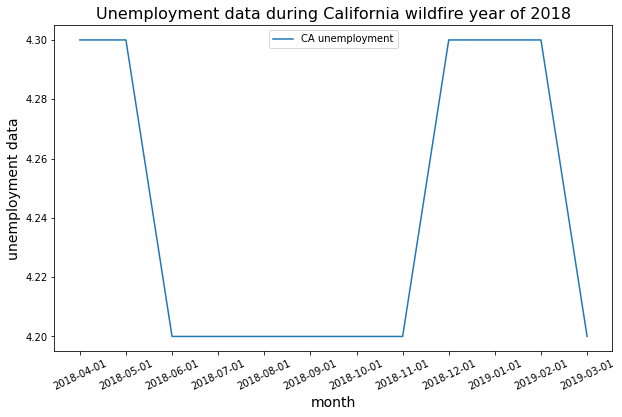

In [4]:
cali_unemp = Economy('2018-04-01', '2019-04-01', path+'ca_unemp.csv')
filtered_data_ca = cali_unemp.filter_unemp_data('CAUR', 12)
cali_unemp.make_graph(filtered_data_ca, 
                      'month',
                      'unemployment data', 
                      'Unemployment data during California wildfire year of 2018',
                      ['CA unemployment'],
                      path+'figures/ca_unemp.png')

In [5]:
filtered_data_ca

,caur
date,
2018-04-01,4.3
2018-05-01,4.3
2018-06-01,4.2
2018-07-01,4.2
2018-08-01,4.2
2018-09-01,4.2
2018-10-01,4.2
2018-11-01,4.2
2018-12-01,4.3


# running the local economy for hurricane Katrina

In [6]:
la_unemp = Economy('2005-05-01', '2006-05-01', path+'la_unemp.csv')

In [7]:
filtered_data_la = la_unemp.filter_unemp_data('LAUR', 12)

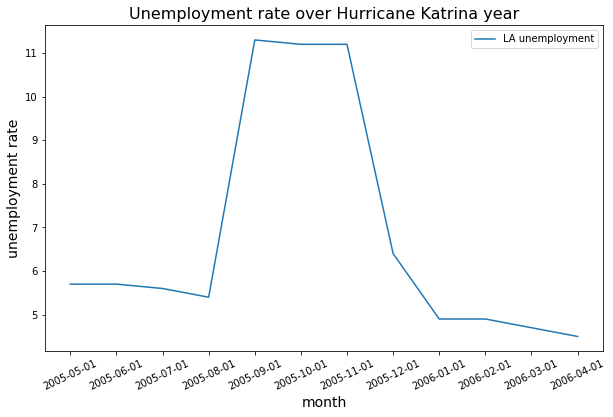

In [8]:
la_unemp.make_graph(filtered_data_la,
                    'month', 
                    'unemployment rate',
                    'Unemployment rate over Hurricane Katrina year',
                    ['LA unemployment'],
                    path+'figures/la_unemp.png')

# us unemployment during katrina, california, and recession

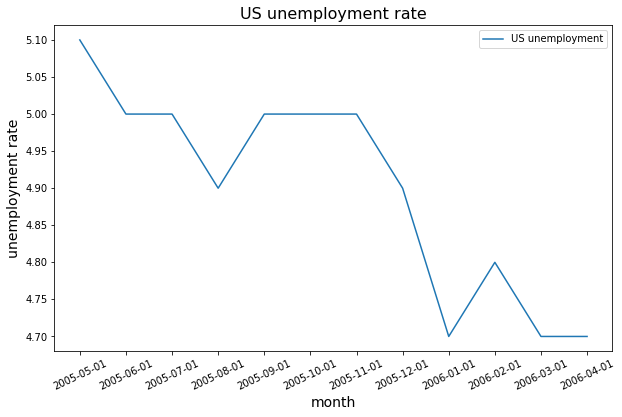

In [9]:
us_unemp = Economy('2005-05-01', '2006-05-01', path+'us_unemp.csv')
filtered_data_us = us_unemp.filter_unemp_data('UNRATE', 12)
us_unemp.make_graph(filtered_data_us,
                    'month', 
                    'unemployment rate',
                    'US unemployment rate', 
                    ['US unemployment'],
                    path+'figures/us_unemp.png')

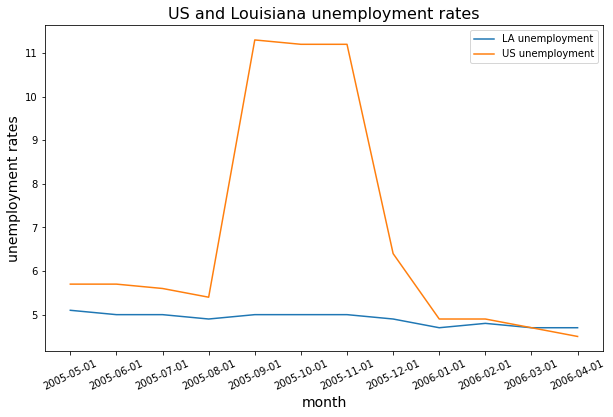

In [10]:
us_unemp.make_graph(filtered_data_us.append(filtered_data_la),
                    'month', 
                    'unemployment rates', 
                    'US and Louisiana unemployment rates', 
                    ['LA unemployment', 'US unemployment'],
                    path+'figures/us_la_unemp.png')

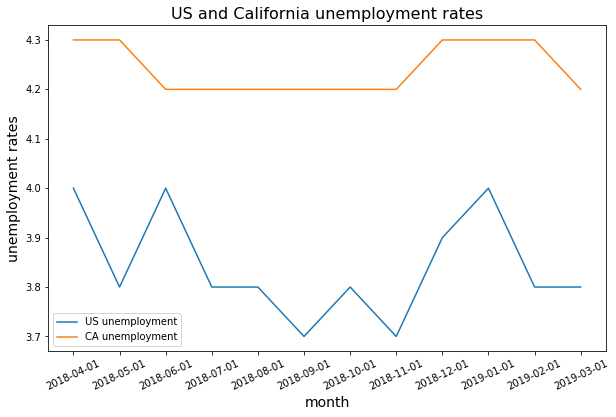

In [11]:
us_cali_unemp = Economy('2018-04-01', '2019-04-01', path+'us_unemp.csv')
filtered_data_us = us_cali_unemp.filter_unemp_data('UNRATE', 12)

us_cali_unemp.make_graph(filtered_data_us.append(filtered_data_ca), 
                         'month', 
                         'unemployment rates',
                         'US and California unemployment rates',
                         ['US unemployment', 'CA unemployment'],
                         path+'figures/ca_us_unemp.png')

In [12]:
filtered_data_us.describe()

,unrate
count,12.000000
mean,3.841667
std,0.108362
min,3.700000
25%,3.800000
50%,3.800000
75%,3.925000
max,4.000000


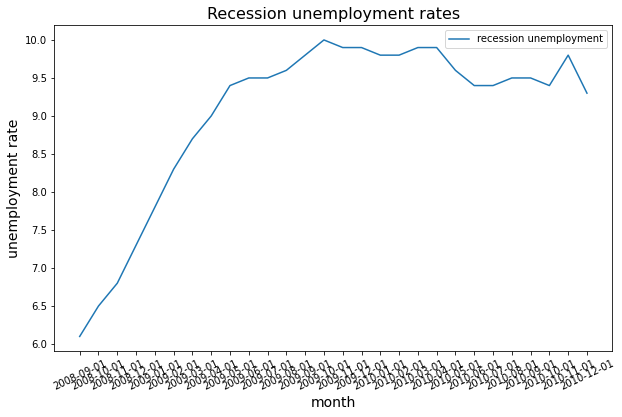

In [13]:
recession_unemp = Economy('2008-09-01', '', path+'us_unemp.csv')
filtered_rec = recession_unemp.filter_unemp_data('UNRATE', 28)
recession_unemp.make_graph(filtered_rec,
                           'month',
                           'unemployment rate', 
                           'Recession unemployment rates',
                           ['recession unemployment'], 
                           path+'figures/recession_unemp.png')

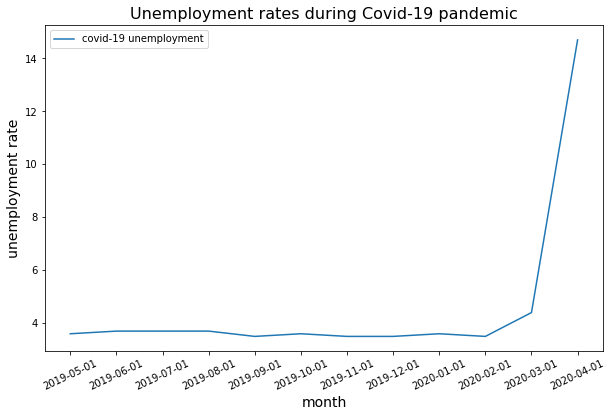

In [14]:
covid_unemp = Economy('2019-05-01', '', path+'us_unemp.csv')
covid_filter = covid_unemp.filter_unemp_data('UNRATE', 12)
covid_unemp.make_graph(covid_filter, 
                       'month', 
                       'unemployment rate',
                       'Unemployment rates during Covid-19 pandemic',
                       ['covid-19 unemployment'],
                       path+'figures/cov_unemp.png')

In [15]:
covid_filter

,unrate
date,
2019-05-01,3.6
2019-06-01,3.7
2019-07-01,3.7
2019-08-01,3.7
2019-09-01,3.5
2019-10-01,3.6
2019-11-01,3.5
2019-12-01,3.5
2020-01-01,3.6


# Stock data 

In [0]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=430caec8561736601d20ae73e1e362a3804267680a9516628cf11f3a7f7cb37e
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


This class is a container for the stock data that is being loaded with the specific time series. There is normalized data and functionality for plotting the data. 

In [16]:
import yfinance as yf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Comparing stocks at a local level
class StockData:

    # initializing the class
    def __init__(self, stock_list, start_date, end_date):
        self.stock_list = stock_list
        self.start_date = start_date
        self.end_date = end_date

    # getting data from the stock
    def get_data(self):
        stock_ticker = yf.Tickers(' '.join([stock for (stock,_) in self.stock_list]))
        self.data = stock_ticker.history(
            interval='1d', 
            start=self.start_date, 
            end=self.end_date)['Close']
        self.data.rename(
            columns={ stock.upper(): name for (stock, name) in self.stock_list }, 
            inplace=True)

    # normalizing the data from the stocks
    def normalize_data(self):
        self.norm_data = pd.DataFrame()
        for (_, name) in self.stock_list:
            min_val = self.data[name].min(axis=0)
            max_val = self.data[name].max(axis=0)
            numerator = self.data[name] - min_val
            denominator = max_val - min_val
            # numerator = self.data[name] - self.data[name].mean(axis=0)
            # denominator = self.data[name].std(axis=0)
            self.norm_data[name] = numerator / denominator

    # visual representation of the data
    def plot_data(self, mean, title, labels, fig_path):
        plt.figure(figsize=(10, 6))
        if mean:
            plt.plot(self.norm_data.mean(axis=1))
            title = title + '_mean'
        else:
            plt.plot(self.norm_data)
        plt.xlabel('Date')
        plt.ylabel('Normalized Stock price')
        plt.title(title)
        plt.legend(loc=(1.04, 0), labels=labels)
        plt.savefig(fig_path)


The following is the gathering of all data within the specified time periods for each of the designated events. The events are Hurricane Katrina, the California wildfires of 2018, the recession of 2008 and our current Covid-19 situation. The data is gather and the appropriate plots are created for each of the timeframes.

[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed


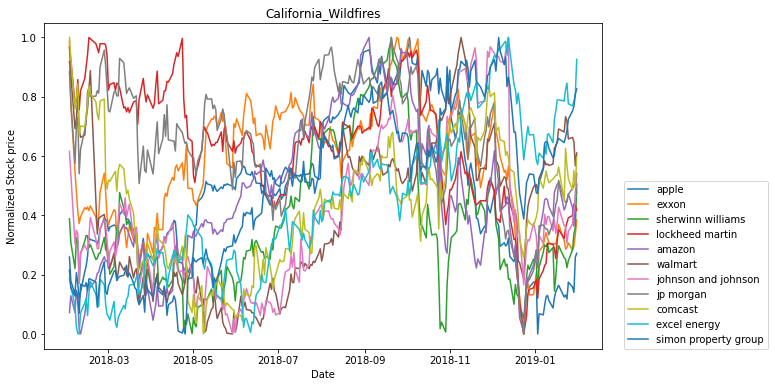

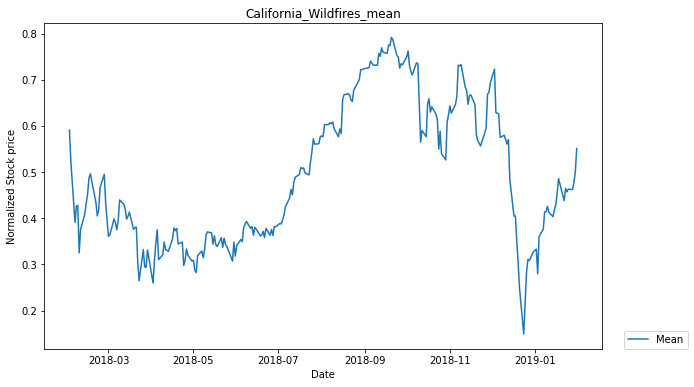

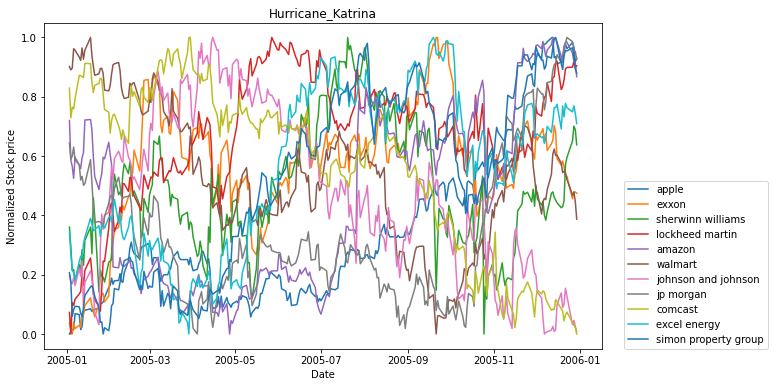

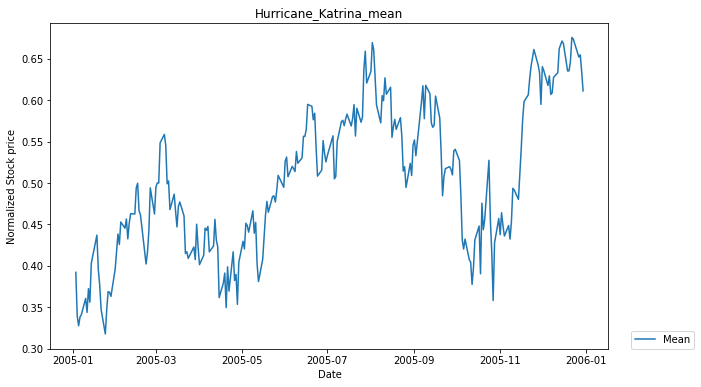

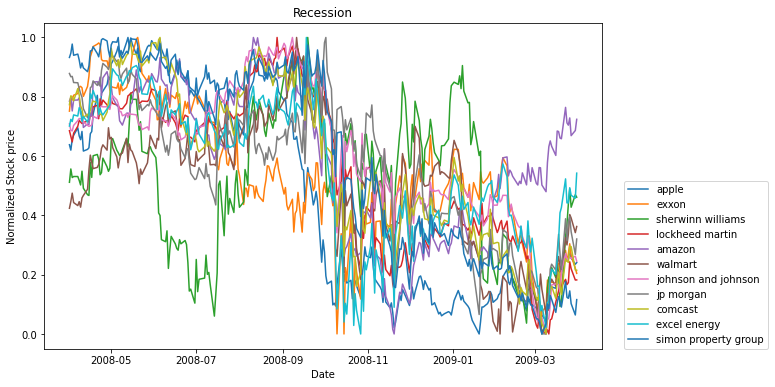

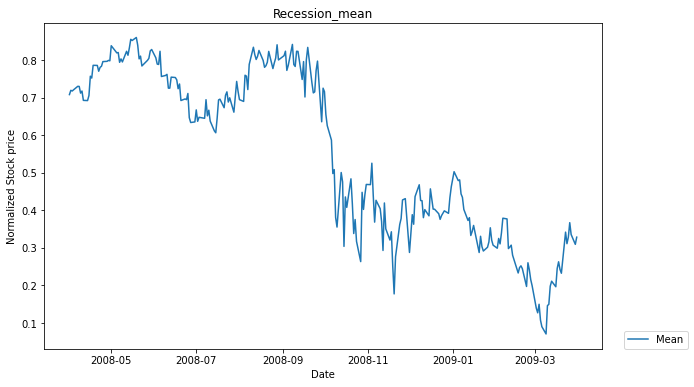

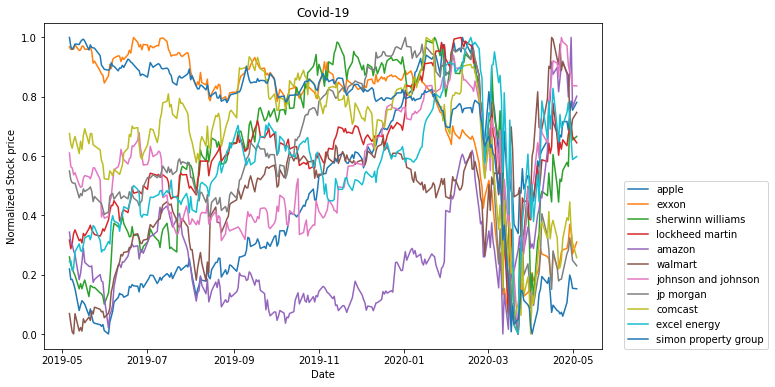

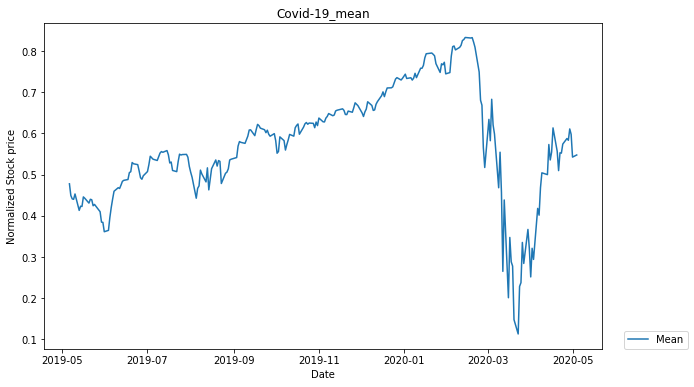

In [17]:
# controller
def timeframe_stock_data(timeframes):
    data = {}
    # making the data for each time frame 
    for name, [start, end] in timeframes.items():
        stocks = StockData(stock_list, start, end)
        stocks.get_data()
        stocks.normalize_data()
        stocks.plot_data(False, name, [n for (_, n) in stock_list], '../data/figures/'+name+'.png')
        stocks.plot_data(True, name, ['Mean'], '../data/figures/'+name+'_mean.png')
        data[name] = stocks
    return data

# list of the stocks from each sector to compare
stock_list = [
    ('aapl', 'apple'), 
    ('xom', 'exxon'), 
    ('shw', 'sherwinn williams'),
    ('lmt', 'lockheed martin'),
    ('amzn', 'amazon'),
    ('wmt', 'walmart'),
    ('jnj', 'johnson and johnson'),
    ('jpm', 'jp morgan'),
    ('cmcsa', 'comcast'),
    ('xel', 'excel energy'),
    ('spg', 'simon property group')
]

# running the main program
timeframes = {
    'California_Wildfires': ['2018-02-01', '2019-02-01'],
    'Hurricane_Katrina': ['2005-01-01', '2006-01-01'],
    'Recession': ['2008-04-01', '2009-04-01'],
    'Covid-19': ['2019-05-05', '2020-05-05']
}
    
# getting the data for the time frame
timeframe_data = timeframe_stock_data(timeframes)

In [18]:
time_data = pd.DataFrame()
for name, data in timeframe_data.items():
    mean_data = data.norm_data.mean(axis=1).to_numpy()[:251]
    time_data[name] = mean_data
time_data = time_data.dropna()

In [19]:
time_data.head()

,California_Wildfires,Hurricane_Katrina,Recession,Covid-19
0,0.590865,0.392209,0.708254,0.477850
1,0.523801,0.339389,0.719538,0.449527
2,0.390989,0.327662,0.717809,0.441189
3,0.426669,0.338385,0.721033,0.440254
4,0.427766,0.341314,0.730283,0.453175


In [19]:
time_data_values = time_data.values

Measuring the cross entropy for each dataset against the other datasets

In [20]:
# making buckets for the data 
def make_probability_buckets(data):
    buckets = {}
    for point in data:
        if point not in buckets:
            buckets[point] = 1
        else:
            value = buckets.get(point)
            buckets[point] = value + 1

    length = len(data)
    for key, prob in buckets.items():
        buckets[key] = prob / length

    return buckets

In [21]:
# measuring the cross entropy of two datasets
def cross_entropy(data_one, data_two):
    data_one = data_transform(data_one)
    data_two = data_transform(data_two)
    m = -np.multiply(data_one, np.log2(data_two))
    return np.sum(m)

In [22]:
def data_transform(data):
    data = np.floor(data * 100).astype(int)
    buckets = make_probability_buckets(data)
    data = [buckets[point] for point in data]
    return data

In [23]:
def mutual_information(data_one, data_two):
    # transforming the data into its probabilities
    data_one_trans = data_transform(data_one)
    data_two_trans = data_transform(data_two)
    total = 0

    # go through each of the lists inputs 
    for point in data_one_trans:
        for point_two in data_two_trans:
        # getting the joint probabilities of the data
            joint_data = point * point_two
            point_two_conditional = point_two * point / point
            point_conditional = point * point_two / point_two
            total += joint_data - point_two_conditional - point_conditional
        # joint_data = data_transform(
        #     np.divide(np.multiply(data_one_trans, 
        #                         data_two_trans), 
        #             data_two_trans))
        # # running the log function on the probabilities
        # log_data = np.log2(
        #     np.divide(joint_data, 
        #             np.multiply(data_one_trans, 
        #                         data_two_trans)))
    
    return total

In [24]:
from sklearn.metrics import mutual_info_score

In [25]:
# covid data for comparison for modeling
data = time_data_values[:, 3]

# getting the cross entropy comparison of each value agains the other
for i in range(3):
    ent = cross_entropy(data, time_data_values[:, i])
    print(mutual_info_score(data, time_data_values[:, i]))
    print(f'({i}) = {ent}')

5.5254529391317835
(0) = 36.23059566235318
5.5254529391317835
(1) = 33.8313637181726
5.5254529391317835
(2) = 37.82851869059304


Plotting the full time data and plotting the comparison between the California wildfire data and the Covid-19 data

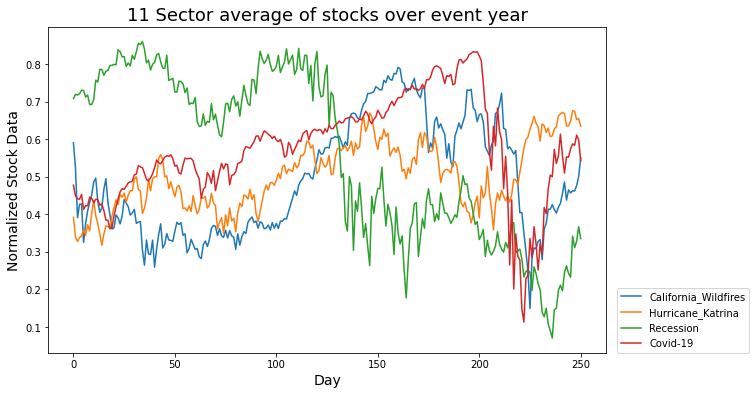

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(time_data)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Normalized Stock Data', fontsize=14)
plt.title('11 Sector average of stocks over event year', fontsize=18)
plt.legend(loc=(1.02, 0), labels=time_data.columns)
plt.savefig('../data/figures/11sector_comparison.png')

In [27]:
def plot_figure(data, cols, xlabel, ylabel, title, labels, path):
    plt.figure(figsize=(10, 6))
    plt.plot(data[cols])
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=18)
    plt.legend(loc=(1.02, 0), labels=labels)
    plt.savefig(path)

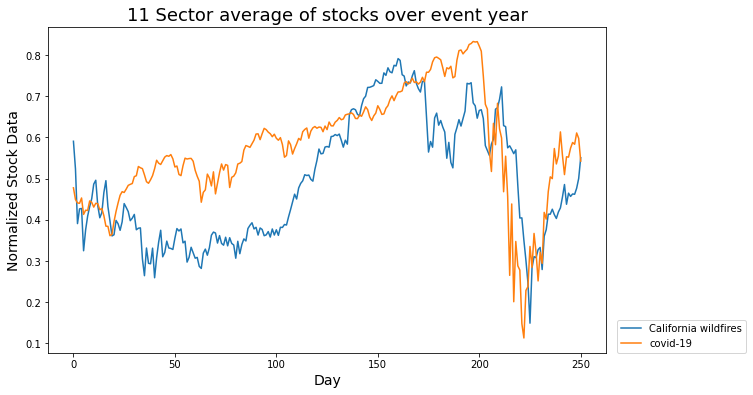

In [28]:
plot_figure(
    time_data, 
    ['California_Wildfires', 'Covid-19'],
    'Day',
    'Normalized Stock Data', 
    '11 Sector average of stocks over event year',
    ['California wildfires', 'covid-19'],
    '../data/figures/covid_cali.png')

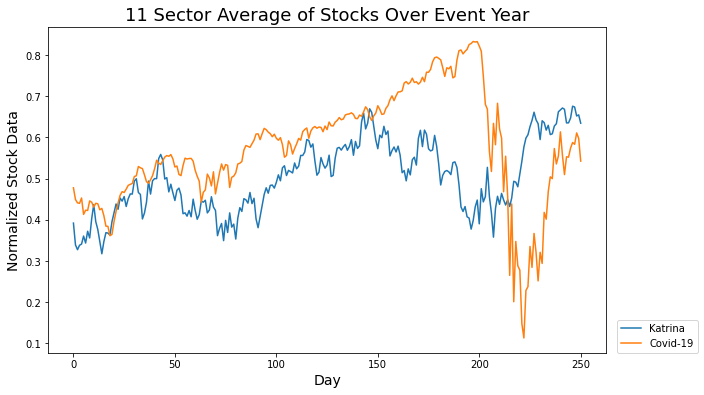

In [29]:
plot_figure(
    time_data,
    ['Hurricane_Katrina', 'Covid-19'],
    'Day',
    'Normalized Stock Data',
    '11 Sector Average of Stocks Over Event Year',
    ['Katrina', 'Covid-19'],
    '../data/figures/katrina_covid.png'
)

# Testing 

In [0]:
import numpy as np
import pandas as pd
import yfinance as yf

In [0]:
time_data = time_data.dropna()
time_data.head()

,California_Wildfires,Hurricane_Katrina,Recession,Covid-19
1,0.523801,0.339389,0.708254,0.449527
2,0.390989,0.327662,0.719538,0.441189
3,0.426669,0.338385,0.717809,0.440254
4,0.427766,0.341314,0.721033,0.453175
5,0.325062,0.360732,0.730283,0.413343


In [0]:
time_data_array = time_data.to_numpy()

Getting the Pearson correlation value to determine how closely related the values are to each other. This will be contained in a dataframe used to determine the model to use for prediction.

In [0]:
coef_data = pd.DataFrame(
    np.corrcoef(time_data_array.T), 
    index=list(time_data.columns),
    columns=list(time_data.columns)
)

NameError: ignored

In [0]:
coef_data.head()

,California_Wildfires,Hurricane_Katrina,Recession,Covid-19
California_Wildfires,1.000000,0.313929,-0.472706,0.676905
Hurricane_Katrina,0.313929,1.000000,-0.543248,0.174880
Recession,-0.472706,-0.543248,1.000000,-0.146440
Covid-19,0.676905,0.174880,-0.146440,1.000000


In the above data we see that the strongest correlation to the Covid-19 data is the California wildfire data. A model based on California wildfire will be used to predict the Covid-19 future. 

Below we will create the model based on the California wildfires using a time series and Tensorflow.

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib as mpl 
mpl.rcParams['figure.figsize'] = (10, 6)

Making a method for grouping the time series based on a window size.

In [0]:
tickers = yf.Tickers([stock for (stock, _) in stock_list])
data = tickers.history('23mo', interval='60m')['Close']
data = data.dropna()

[*********************100%***********************]  11 of 11 completed


In [0]:
data.info

<bound method DataFrame.info of                                  AAPL         AMZN  ...        XEL        XOM
Datetime                                            ...                      
2018-06-07 15:30:00-04:00  193.440002  1688.170044  ...  42.720001  82.849998
2018-06-08 09:30:00-04:00  190.380005  1682.420044  ...  42.630001  83.190002
2018-06-08 10:30:00-04:00  190.750000  1686.865967  ...  42.584999  83.280998
2018-06-08 11:30:00-04:00  190.959595  1687.800049  ...  42.679901  83.209999
2018-06-08 12:30:00-04:00  191.350006  1686.678711  ...  42.625000  83.419998
...                               ...          ...  ...        ...        ...
2020-05-07 11:30:00-04:00  304.255188  2361.899902  ...  60.549999  44.946400
2020-05-07 12:30:00-04:00  303.880005  2360.612305  ...  60.735001  44.509399
2020-05-07 13:30:00-04:00  303.540009  2357.000000  ...  61.090000  44.349998
2020-05-07 14:30:00-04:00  303.350006  2357.302734  ...  60.430000  44.224998
2020-05-07 15:30:00-04:00  303.2

In [0]:
data.head()

,AAPL,AMZN,CMCSA,JNJ,JPM,LMT,SHW,SPG,WMT,XEL,XOM
Datetime,,,,,,,,,,,
2018-06-07 15:30:00-04:00,193.440002,1688.170044,32.009998,123.290001,110.750000,321.929993,394.940002,164.869995,84.949997,42.720001,82.849998
2018-06-08 09:30:00-04:00,190.380005,1682.420044,31.879999,124.540001,110.559998,319.820007,395.035004,164.970001,84.400002,42.630001,83.190002
2018-06-08 10:30:00-04:00,190.750000,1686.865967,32.080002,123.930000,110.540001,319.950012,394.380005,165.300003,84.430000,42.584999,83.280998
2018-06-08 11:30:00-04:00,190.959595,1687.800049,32.109901,124.199997,110.870003,320.010010,396.170013,165.199997,84.580002,42.679901,83.209999
2018-06-08 12:30:00-04:00,191.350006,1686.678711,32.049999,124.050003,110.800003,319.779999,396.510010,165.220001,84.610001,42.625000,83.419998


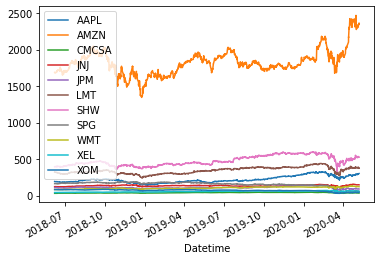

In [0]:
data.plot()

In [0]:
dataset = data.values

In [0]:
dataset_min = np.min(dataset, axis=0)
dataset_max = np.max(dataset, axis=0)
dataset = (dataset - dataset_min) / (dataset_max - dataset_min)

In [0]:
dataset.shape

(3345, 11)

In [0]:
dataset_mean = np.mean(dataset, axis=1)
dataset_mean = np.reshape(dataset_mean, (dataset_mean.shape[0], 1))
print(dataset_mean.shape)

(3338, 1)


In [0]:
dataset = np.array([np.append(a, dataset_mean[i]) for i, a in enumerate(dataset)])

In [0]:
plt.plot(dataset)
plt.figure()
plt.plot(dataset[:, 11])

In [0]:
tf.random.set_seed(7)

Setting the size of the training and validation data and then proceeding to split the data for training purposes.

In [0]:
def split_data(dataset, target_data, start_index, end_index, window_size):
    data = []
    labels = []

    # going through the data and creating frames of windows for predictions
    end_index = end_index - window_size
    for i in range(start_index, end_index):
        # getting the window for the data 
        window = range(i, i + window_size)
        
        # adding the window sized data to our dataset
        data.append(dataset[window])

        # labels from the target data to predice from the window size
        labels.append(target_data[i + window_size])
    return np.array(data), np.array(labels)

In [0]:
train_size = int(len(dataset) * 0.8)
wind_size = 40

In [0]:
x_train, x_test = dataset[:train_size], dataset[train_size:]
y_train, y_test = dataset[:train_size, 11], dataset[train_size:, 11]

In [0]:
valid_size = int(len(x_train) * 0.8)

x_train, x_valid = x_train[:valid_size], x_train[valid_size:]
y_train, y_valid = y_train[:valid_size], y_train[valid_size:]

In [0]:
x_window_train, y_window_train = split_data(x_train, y_train, 0, x_train.shape[0], wind_size)
x_window_valid, y_window_valid = split_data(x_valid, y_valid, 0, x_valid.shape[0], wind_size)
x_window_test, y_window_test = split_data(x_test, y_test, 0, x_test.shape[0], wind_size)

In [0]:
print(x_window_train.shape)
print(x_window_valid.shape)
print(x_window_test.shape)

(2096, 40, 12)
(494, 40, 12)
(628, 40, 12)


Checking that the data was split properly and that the plot is matching.

In [0]:
def plot_model(dataset, target, prediction, window_size, title):
    labels = ['x values', 'actual', 'prediction']
    marker = ['.-', 'rx', 'go']

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.plot(range(window_size), dataset[:, 11], marker[0], label=labels[0])
    plt.plot(window_size, target, marker[1], label=labels[1])
    if prediction is not None:
        plt.plot(window_size, prediction, marker[2], label=labels[2])
    plt.xlabel('data')
    plt.ylabel('y data')
    plt.legend()

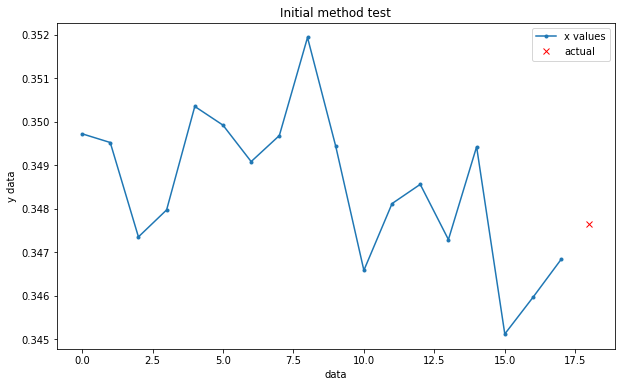

In [0]:
plot_model(x_window_train[0], y_window_train[0], None, wind_size, 'Initial method test')

Training the model 

In [0]:
BATCH_SIZE = 256
BUFFER_SIZE = 400

x_values = tf.data.Dataset.from_tensor_slices((x_window_train, y_window_train))
x_values = x_values.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

x_valid_data = tf.data.Dataset.from_tensor_slices((x_window_valid, y_window_valid))
x_valid_data = x_valid_data.batch(BATCH_SIZE).repeat()

x_test_data = tf.data.Dataset.from_tensor_slices((x_window_test, y_window_test))
x_test_data = x_test_data.batch(BATCH_SIZE).repeat()

In [0]:
for x, y in x_values.take(1):
    print(x)

tf.Tensor(
[[[0.26070757 0.44687282 0.1498569  ... 0.11827958 0.90973583 0.40934624]
  [0.25946535 0.4412724  0.14762974 ... 0.12203451 0.91558796 0.41073364]
  [0.26011345 0.44448943 0.13522123 ... 0.11964503 0.9173613  0.40782611]
  ...
  [0.27790447 0.44296771 0.07126953 ... 0.12049847 0.93411959 0.41237572]
  [0.27886581 0.44815587 0.08304181 ... 0.11930374 0.93083877 0.41529765]
  [0.278909   0.44750071 0.08908682 ... 0.11623153 0.93544956 0.41704444]]

 [[0.35274102 0.43453124 0.17499214 ... 0.15412185 0.87578834 0.44318063]
  [0.35166083 0.43608131 0.20489971 ... 0.1645332  0.87515515 0.45244644]
  [0.35198488 0.43081147 0.21603576 ... 0.17187234 0.87474371 0.45632585]
  ...
  [0.35754793 0.48864247 0.2087178  ... 0.19610866 0.86256428 0.45145713]
  [0.35641376 0.48829985 0.20681519 ... 0.19064685 0.86300765 0.45115778]
  [0.35392983 0.48697388 0.20108185 ... 0.18757478 0.86291903 0.44938349]]

 [[0.26405618 0.42071988 0.20426348 ... 0.15412185 0.91133179 0.43703553]
  [0.259303

In [0]:
model = Sequential([
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])

model.compile(
    optimizer=tf.optimizers.RMSprop(0.006),
    loss='mae',
    metrics=['accuracy']
)

In [0]:
for xv, yv in x_values.take(1):
    print(model.predict(xv).shape)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

(256, 1)


In [0]:
model.fit(
    x_values,
    epochs=250,
    steps_per_epoch=100,
    validation_data=x_valid_data,
    validation_steps=50
)

Epoch 1/250

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

100/100 [==============================] - 1s 10ms/step - loss: 0.0747 - accuracy: 0.0000e+00 - val_loss: 0.1533 - val_accuracy: 0.0000e+00
Epoch 2/250
100/100 [==============================] - 1s 7ms/step - loss: 0.0383 - accuracy: 0.0000e+00 - val_loss: 0.1084 - val_accuracy: 0.0000e+00
Epoch 3/250
100/100 [==============================] - 1s 7ms/step - loss: 0.0333 - accuracy: 0.0000e+00 - val_loss: 0.0990 - val_accuracy: 0.0000e+00
Epoch 4/250
100/100 [==============================] -

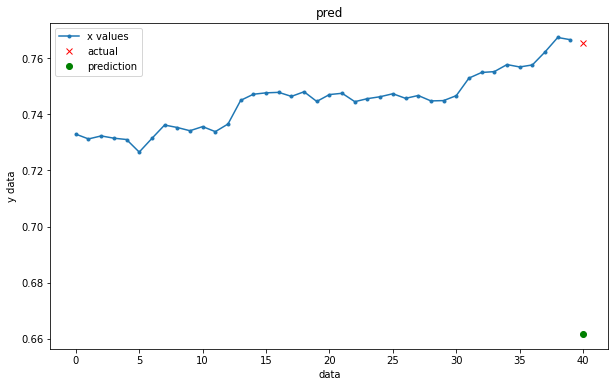

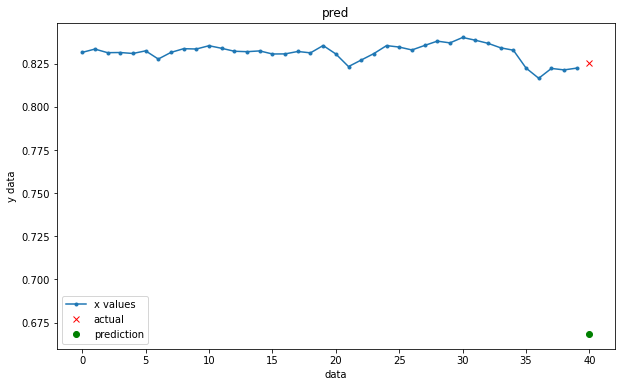

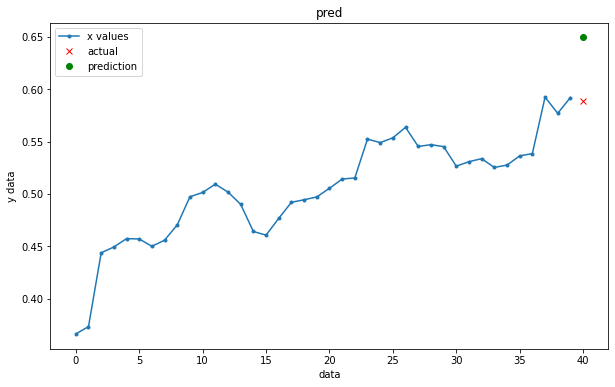

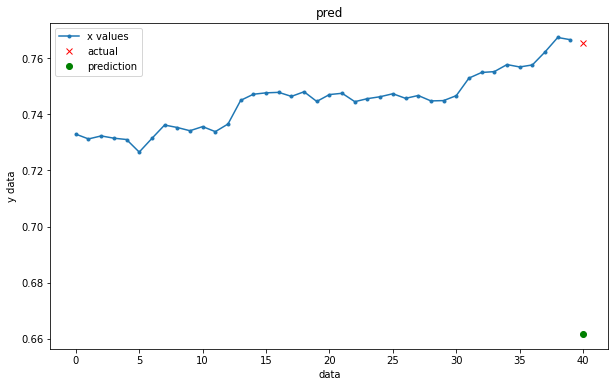

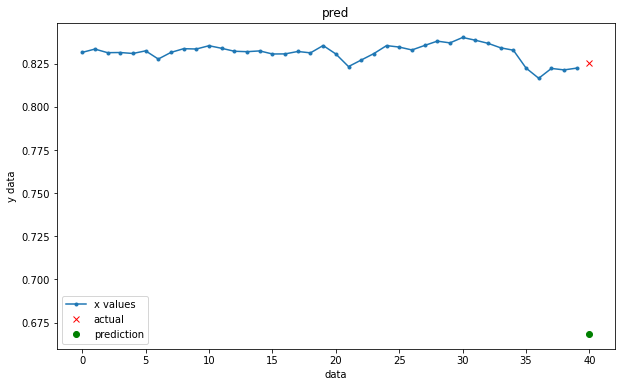

In [0]:
import matplotlib.pyplot as plt
for xt, yt in x_test_data.take(5):
    plot_model(xt[0].numpy(), yt[0].numpy(), model.predict(xt)[0], wind_size, 'pred')
    plt.show()

calculating std dev 